## Phylogenetic Tree Test MultiFasta

In [2]:
#import Biopython
import Bio as Bio
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez
import json

In [2]:
#import the sequences we will use. These are 16s sequences from GenBank
#example: https://www.ncbi.nlm.nih.gov/nuccore/FJ039971.1?report=genbank 
t1 = SeqIO.read("sequences1.fasta", "fasta")
t2 = SeqIO.read("sequences2.fasta", "fasta")
t3 = SeqIO.read("sequences3.fasta", "fasta")
t4 = SeqIO.read("sequences4.fasta", "fasta")
t5 = SeqIO.read("sequences5.fasta", "fasta")
t6 = SeqIO.read("sequences6.fasta", "fasta")

In [3]:
#rename each of the sequences 
#this step is not required, it will just make the tree easier to understand 
print(t3.description)
t1.id = 'Loggerhead'
t2.id = 'Hawksbill'
t3.id = 'Leatherback'
t4.id = 'Kemps Ridley'
t5.id = 'Flatback'
t6.id = 'Green'

MF537044.1 Isurus oxyrinchus mitochondrion, complete genome


In [4]:
t1.seq

Seq('GCTAGTGTAGCTTAATTTAAAGTATGGCACTGAAAATGCTAAGATGAAAATTAA...GAC', SingleLetterAlphabet())

In [5]:
# Combine all of the individual sequences into a new file 
turtles = SeqIO.write([t1,t2,t3,t4,t5,t6], "turtles.fasta", "fasta")

In [7]:
# Load the turtles sequences into MUSCLE 
#https://www.ebi.ac.uk/Tools/msa/muscle/
# Upload the new alignment file to your folder or working directory

In [6]:
#===========================        TODO        =============
#=========================== HACER MUSCLE LOCAL =============
from Bio.Align.Applications import MuscleCommandline
muscle_exe = r"C:\Users\Jimen\OneDrive\Escritorio\Testing_project\muscle3.8.31_i86win32"
muscle_cline = MuscleCommandline(muscle_exe,input="turtles.fasta")
stdout, stderr = muscle_cline()
from io import StringIO
from Bio import AlignIO
align = AlignIO.read(StringIO(stdout), "fasta")
print(align)

SingleLetterAlphabet() alignment with 6 rows and 16913 columns
GCTAGTGTAGCTTAA-TTTAAAGTATGGCACTGAAAATGCTAAG...GAC Loggerhead
GTTAACGTAGCTTAA-TTTAAAGCATGGCACTGAAGATGCTAAG...GAT Kemps
GCTAGTGTAGCTTAA-TTTAAAGCATGGCACTGAAGATGCTAAG...GAT Hawksbill
GCTAGTGTAGCTTAATTTTAAAGCATGGCACTGAAGATGCTAAG...GAT Green
GCTAGTGTAGCTTAA-TTTAAAGCATGGCACTGAAGATGCTAAG...GAT Leatherback
GCTAGTGTAGCTTAATTTTAAAGCATGGCACTGAAGATGCTAAT...GAT Flatback


In [7]:
AlignIO.write(align, "turtlesaln.aln", "clustal")

1

In [5]:
help(MuscleCommandline())

Help on class MuscleCommandline in module Bio.Align.Applications._Muscle:

class MuscleCommandline(Bio.Application.AbstractCommandline)
 |  MuscleCommandline(cmd='muscle', **kwargs)
 |  
 |  Command line wrapper for the multiple alignment program MUSCLE.
 |  
 |  http://www.drive5.com/muscle/
 |  
 |  Notes
 |  -----
 |  Last checked against version: 3.7, briefly against 3.8
 |  
 |  References
 |  ----------
 |  Edgar, Robert C. (2004), MUSCLE: multiple sequence alignment with high
 |  accuracy and high throughput, Nucleic Acids Research 32(5), 1792-97.
 |  
 |  Edgar, R.C. (2004) MUSCLE: a multiple sequence alignment method with
 |  reduced time and space complexity. BMC Bioinformatics 5(1): 113.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import MuscleCommandline
 |  >>> muscle_exe = r"C:\Program Files\Aligments\muscle3.8.31_i86win32.exe"
 |  >>> in_file = r"C:\My Documents\unaligned.fasta"
 |  >>> out_file = r"C:\My Documents\aligned.fasta"
 |  >>> muscle_cli

In [8]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("turtles.aln","r") as aln:
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [22]:
list(alignment)

[SeqRecord(seq=Seq('GCTAGTGTAGCTTAA-TTTAAAGTATGGCACTGAAAATGCTAAGATGAAAATTA...GAC', SingleLetterAlphabet()), id='Loggerhead', name='<unknown name>', description='Loggerhead', dbxrefs=[]),
 SeqRecord(seq=Seq('GTTAACGTAGCTTAA-TTTAAAGCATGGCACTGAAGATGCTAAGATGAAAATTC...GAT', SingleLetterAlphabet()), id='Kemps', name='<unknown name>', description='Kemps', dbxrefs=[]),
 SeqRecord(seq=Seq('GCTAGTGTAGCTTAA-TTTAAAGCATGGCACTGAAGATGCTAAGATGAAAATTA...GAT', SingleLetterAlphabet()), id='Hawksbill', name='<unknown name>', description='Hawksbill', dbxrefs=[]),
 SeqRecord(seq=Seq('GCTAGTGTAGCTTAATTTTAAAGCATGGCACTGAAGATGCTAAGATGAAAATTA...GAT', SingleLetterAlphabet()), id='Green', name='<unknown name>', description='Green', dbxrefs=[]),
 SeqRecord(seq=Seq('GCTAGTGTAGCTTAA-TTTAAAGCATGGCACTGAAGATGCTAAGATGAAAAATG...GAT', SingleLetterAlphabet()), id='Leatherback', name='<unknown name>', description='Leatherback', dbxrefs=[]),
 SeqRecord(seq=Seq('GCTAGTGTAGCTTAATTTTAAAGCATGGCACTGAAGATGCTAATATGAAAAATG...GAT', Si

In [9]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [10]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(align)
print(distance_matrix)

Loggerhead	0
Kemps	0.21184887364749005	0
Hawksbill	0.20782829775912015	0.11500029563058001	0
Green	0.21598770176787085	0.1365813279725655	0.12014426772305331	0
Leatherback	0.2273399160409153	0.20445810914681017	0.19824986696623903	0.20629101874297873	0
Flatback	0.2232010879205345	0.20114704665050553	0.19529356116596697	0.20102879441849464	0.12522911369952106	0
	Loggerhead	Kemps	Hawksbill	Green	Leatherback	Flatback


In [11]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [12]:
# Build the tree 
turtle_tree = constructor.build_tree(align)
turtle_tree.rooted = True
print(turtle_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.030501685094306126, name='Inner2')
            Clade(branch_length=0.04461558170243804, name='Inner1')
                Clade(branch_length=0.06065600425708033, name='Flatback')
                Clade(branch_length=0.06457310944244073, name='Leatherback')
            Clade(branch_length=0.11804036342852633, name='Loggerhead')
        Clade(branch_length=0.004175781942884184, name='Inner3')
            Clade(branch_length=0.052134452787796354, name='Hawksbill')
            Clade(branch_length=0.06286584284278365, name='Kemps')
        Clade(branch_length=0.0666868680896352, name='Green')


In [13]:
# Save the tree to a new file 
Phylo.write(turtle_tree, "turtle_tree.xml", "phyloxml")
Phylo.write(turtle_tree, "turtle_tree.nwk", "newick")

1

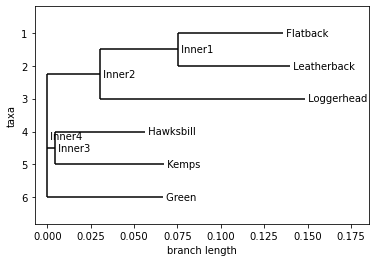

In [14]:
# Import matplotlib and create a basic tree 
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(turtle_tree)

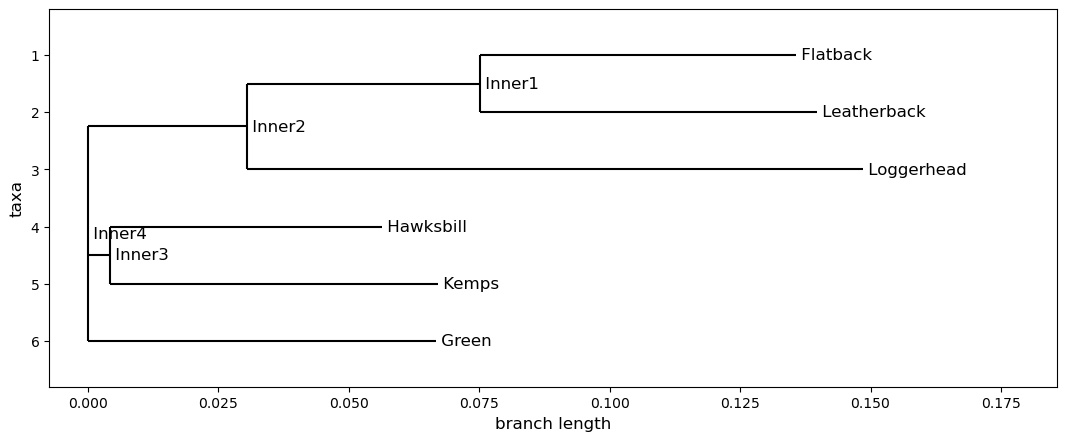

In [15]:
# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(turtle_tree, axes=axes)
fig.savefig("turtles_cladogram")

In [30]:
# Convert the tree to a different format (optional)
Phylo.convert("turtle_tree.xml", "phyloxml", "turtle_tree.nex", "nexus")

1

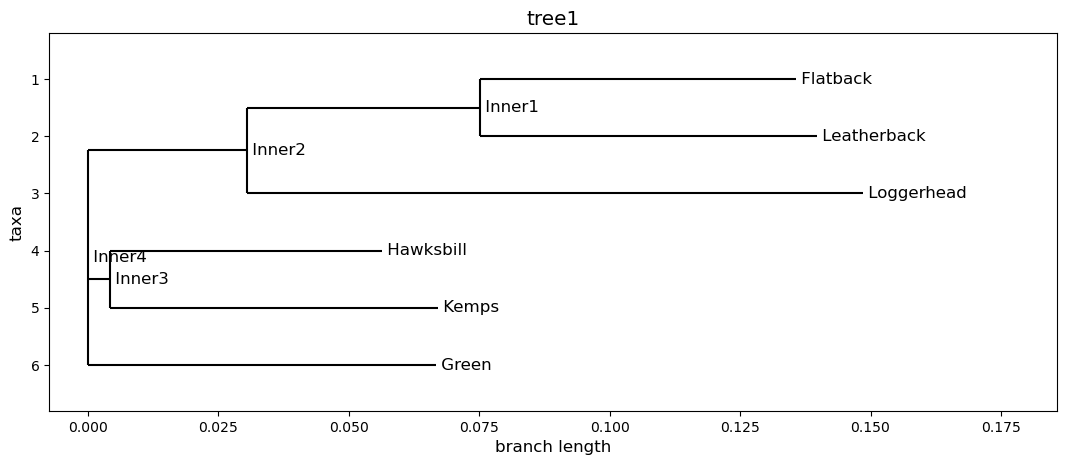

In [32]:
turtle_nex = Phylo.read("turtle_tree.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(turtle_nex, axes=axes)
fig.savefig("turtles2_cladogram")

# Take Genbank from Acc_Number to Show in FrontEnd

In [3]:
#Find Out an 

acc_number_list = ['CR541913','AWGT02000214']#'AY410048','NW_007281581','NM_173917','MKHE01000001','DP001094',
                      #'CM008008','KM522873','AF114701','NM_001144841','DP001067']
Genbank_Results = []
AAA = {}
count = -1
Entrez.email = "jimenerojorge@example.com"  # Always tell NCBI who you are 	
for acc_number in acc_number_list: 
        count+=1
        with Entrez.efetch(db      ="nucleotide",
                           id      = acc_number,
                           rettype ="gb",
                           retmode ="text") as efetch_response:
                           result  = SeqIO.read(efetch_response, "genbank")
                           Genbank_Results.append(result)
        #Get Taxon ID      db_xref = result.features[0].qualifiers['db_xref']
                           #SeqIO.write(Genbank_Results[count],'Genbank'+str(count)+'.gb', 'genbank')
                           #print(db_xref)
                           #print(Genbank_Results)
                    
Genbank_Results[0].id
Genbank_Results[0].description
Genbank_Results[0].seq
Genbank_Results[1].id
Genbank_Results[1].description
Genbank_Results[1].seq

Seq('CAGCCCACCCAGCTGCTGCCAACCTCTTCACCTCTGGGTGCTCTGCCCTGAGCT...GCT', IUPACAmbiguousDNA())

In [16]:
Genbank_Results[0].seq.tostring().upper()

AttributeError: 'Seq' object has no attribute 'tostring'

In [28]:
str(Genbank_Results[0].seq)

'ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCAC'

In [21]:
def get_string(seqobj):
    if isinstance(seqobj,SeqRecord):
        seq = seqobj.seq.tostring().upper()
    elif isinstance(seqobj,Seq):
        seq = seqobj.tostring().upper()
    elif isinstance(seqobj,str):
        seq = seqobj.upper()
    return seq

get_string(A)

NameError: name 'SeqRecord' is not defined

In [6]:
Gb1 = [{'Id': Genbank_Results[0].id ,'Description': Genbank_Results[0].description,'Seq':Genbank_Results[0].seq}]
Gb2 = [{'Id': Genbank_Results[1].id ,'Description': Genbank_Results[1].description,'Seq':Genbank_Results[1].seq}]
print(Gb1)
print(Gb2)
json = {}
json = Gb1 + Gb2

[{'Id': 'CR541913.1', 'Description': 'Homo sapiens full open reading frame cDNA clone RZPDo834E0633D for gene HBB, hemoglobin, beta; complete cds, without stopcodon', 'Seq': Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...CAC', IUPACAmbiguousDNA())}]
[{'Id': 'AWGT02000214.1', 'Description': 'Colinus virginianus strain Texas jcf7180006227083, whole genome shotgun sequence', 'Seq': Seq('CAGCCCACCCAGCTGCTGCCAACCTCTTCACCTCTGGGTGCTCTGCCCTGAGCT...GCT', IUPACAmbiguousDNA())}]


In [7]:
json

[{'Id': 'CR541913.1',
  'Description': 'Homo sapiens full open reading frame cDNA clone RZPDo834E0633D for gene HBB, hemoglobin, beta; complete cds, without stopcodon',
  'Seq': Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...CAC', IUPACAmbiguousDNA())},
 {'Id': 'AWGT02000214.1',
  'Description': 'Colinus virginianus strain Texas jcf7180006227083, whole genome shotgun sequence',
  'Seq': Seq('CAGCCCACCCAGCTGCTGCCAACCTCTTCACCTCTGGGTGCTCTGCCCTGAGCT...GCT', IUPACAmbiguousDNA())}]

In [8]:
my_dict = dict() 
for index,value in enumerate(Genbank_Results):
    my_dict[index] = value
    
print(my_dict[0])

type(my_dict)
app_json = json.dumps(appDict)

ID: CR541913.1
Name: CR541913
Description: Homo sapiens full open reading frame cDNA clone RZPDo834E0633D for gene HBB, hemoglobin, beta; complete cds, without stopcodon
Number of features: 3
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=26-JUL-2016
/accessions=['CR541913']
/sequence_version=1
/keywords=['Full ORF shuttle clone, Gateway(TM), complete cds']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Cloning of human full open reading frames in Gateway(TM) system entry vector (pDONR201)', ...), Reference(title='Direct Submission', ...)]
/comment=RZPD; RZPDo834E0633D, ORFNo 3942
www.rzpd.de/cgi-bin/products/cl.cgi?CloneID=RZPDo834E0633D RZPDLIB;
Human Full ORF Clones Gateway(TM) - RZPD (kan-resist.) RZPD LIB No.
834
www.rzpd.de/cgi-bin/pr

TypeError: Object of type SeqRecord is not JSON serializable

In [24]:
import json

print(Genbank_Results[0].id)
print(Genbank_Results[0].description)
#print(Genbank_Results[0].features)
print(Genbank_Results[0].seq)

Gb1 = [{'Id': Genbank_Results[0].id ,'Description': Genbank_Results[0].description,
        'Seq':Genbank_Results[0].seq }]

print(type(Gb1))


CR541913.1
Homo sapiens full open reading frame cDNA clone RZPDo834E0633D for gene HBB, hemoglobin, beta; complete cds, without stopcodon
ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCAC
<class 'list'>


In [20]:
def CreateGenbankByAccNumber():
    Entrez.email = "jimenerojorge@example.com"  # Always tell NCBI who you are 
    acc_number_list = ['CR541913','AWGT02000214']#,'AY410048','NW_007281581','NM_173917','MKHE01000001','DP001094','CM008008','KM522873','AF114701','NM_001144841','DP001067']
    Genbank_Results = []
    count = -1	
    my_dict = dict() 
    for acc_number in acc_number_list: 
            count+=1
            with Entrez.efetch(db      ="nucleotide",
                               id      = acc_number,
                               rettype ="gb",
                               retmode ="text") as efetch_response:
                               result  = SeqIO.read(efetch_response, "genbank")
                               Genbank_Results.append(result)
                               # print(result)
                               #SeqIO.write(Genbank_Results[count],'/home/george/Escritorio/GenBankFiles/Genbank'+str(count)+'.gb', 'genbank')
                               # print(Genbank_Results)

    for index,value in enumerate(Genbank_Results):
        my_dict[index] = value  

    print(my_dict)
    myResponse = str(Genbank_Results)
    #return JsonResponse( Genbank_Results, default="default_json", safe=False)
    return Genbank_Results

CreateGenbankByAccNumber()

{0: SeqRecord(seq=Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...CAC', IUPACAmbiguousDNA()), id='CR541913.1', name='CR541913', description='Homo sapiens full open reading frame cDNA clone RZPDo834E0633D for gene HBB, hemoglobin, beta; complete cds, without stopcodon', dbxrefs=[]), 1: SeqRecord(seq=Seq('CAGCCCACCCAGCTGCTGCCAACCTCTTCACCTCTGGGTGCTCTGCCCTGAGCT...GCT', IUPACAmbiguousDNA()), id='AWGT02000214.1', name='AWGT02000214', description='Colinus virginianus strain Texas jcf7180006227083, whole genome shotgun sequence', dbxrefs=['BioProject:PRJNA188411', 'BioSample:SAMN02981558'])}


[SeqRecord(seq=Seq('ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAG...CAC', IUPACAmbiguousDNA()), id='CR541913.1', name='CR541913', description='Homo sapiens full open reading frame cDNA clone RZPDo834E0633D for gene HBB, hemoglobin, beta; complete cds, without stopcodon', dbxrefs=[]),
 SeqRecord(seq=Seq('CAGCCCACCCAGCTGCTGCCAACCTCTTCACCTCTGGGTGCTCTGCCCTGAGCT...GCT', IUPACAmbiguousDNA()), id='AWGT02000214.1', name='AWGT02000214', description='Colinus virginianus strain Texas jcf7180006227083, whole genome shotgun sequence', dbxrefs=['BioProject:PRJNA188411', 'BioSample:SAMN02981558'])]